## Image Thresholding

#### Goals
<p> • In this tutorial, you will learn Simple thresholding, Adaptive thresholding, Otsu’s thresholding etc.
<p>• You will learn these functions : cv2.threshold, cv2.adaptiveThreshold etc.

### Simple Thresholding

<p> Here, the matter is straight forward. If pixel value is greater than a threshold value, it is assigned one value (may be
white), else it is assigned another value (may be black). The function used is cv2.threshold. First argument is the
source image, which should be a grayscale image. Second argument is the threshold value which is used to classify
the pixel values. Third argument is the maxVal which represents the value to be given if pixel value is more than
(sometimes less than) the threshold value. OpenCV provides different styles of thresholding and it is decided by the
fourth parameter of the function. Different types are:
<p> • cv2.THRESH_BINARY
<p> • cv2.THRESH_BINARY_INV
<p> • cv2.THRESH_TRUNC
<p> • cv2.THRESH_TOZERO
<p> • cv2.THRESH_TOZERO_INV
<p> Documentation clearly explain what each type is meant for. Please check out the documentation.
<p> Two outputs are obtained. First one is a retval which will be explained later. Second output is our thresholded image.

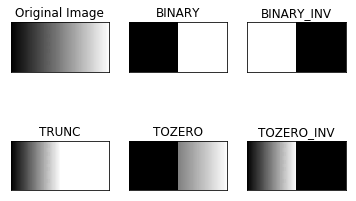

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/gradient.jpg',0)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']

images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in xrange(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

**Note:**To plot multiple images, we have used plt.subplot() function. Please checkout Matplotlib docs for more details.

### Adaptative Thresholding

<p>In the previous section, we used a global value as threshold value. But it may not be good in all the conditions where
image has different lighting conditions in different areas. In that case, we go for adaptive thresholding. In this, the
algorithm calculate the threshold for a small regions of the image. So we get different thresholds for different regions
of the same image and it gives us better results for images with varying illumination.
<p>It has three ‘special’ input params and only one output argument.
<p>**Adaptive Method - It decides how thresholding value is calculated.**
<p>• cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.
<p>• cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values
where weights are a gaussian window.
<p>**Block Size **- It decides the size of neighbourhood area.
<p>**C** - It is just a constant which is subtracted from the mean or weighted mean calculated.
<p>Below piece of code compares global thresholding and adaptive thresholding for an image with varying illumination:

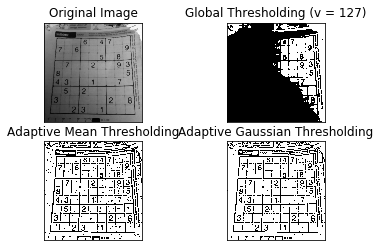

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/sudoku.jpg',0)
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

images = [img, th1, th2, th3]

for i in xrange(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

### Otsu’s Binarization

<p>In the first section, I told you there is a second parameter retVal. Its use comes when we go for Otsu’s Binarization.
So what is it?
<p>In global thresholding, we used an arbitrary value for threshold value, right? So, how can we know a value we selected
is good or not? Answer is, trial and error method. But consider a bimodal image (In simple words, bimodal image is
an image whose histogram has two peaks). For that image, we can approximately take a value in the middle of those
peaks as threshold value, right ? That is what Otsu binarization does. So in simple words, it automatically calculates
a threshold value from image histogram for a bimodal image. (For images which are not bimodal, binarization won’t
be accurate.)
<p>For this, our cv2.threshold() function is used, but pass an extra flag, cv2.THRESH_OTSU. For threshold value, simply
pass zero. Then the algorithm finds the optimal threshold value and returns you as the second output, retVal. If
<p>Otsu thresholding is not used, retVal is same as the threshold value you used.
<p>Check out below example. Input image is a noisy image. In first case, I applied global thresholding for a value of
127. In second case, I applied Otsu’s thresholding directly. In third case, I filtered image with a 5x5 gaussian kernel
to remove the noise, then applied Otsu thresholding. See how noise filtering improves the result.

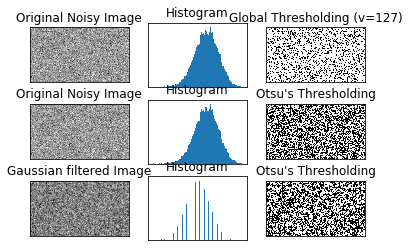

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('img/noise.jpg',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1,
img, 0, th2,
blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

### How Otsu’s Binarization Works?

<p>This section demonstrates a Python implementation of Otsu’s binarization to show how it works actually. If you are
not interested, you can skip this.
<p>Since we are working with bimodal images, Otsu’s algorithm tries to find a threshold value (t) which minimizes the
weighted within-class variance given by the relation :

<p>It actually finds a value of t which lies in between two peaks such that variances to both classes are minimum. It can
be simply implemented in Python as follows:

In [26]:
img = cv2.imread('img/noise.jpg',0)
blur = cv2.GaussianBlur(img,(5,5),0)

# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()

bins = np.arange(256)
fn_min = np.inf

thresh = -1
for i in xrange(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print thresh,ret

123 152.0


C:\Users\suzan\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\suzan\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\suzan\AppData\Local\conda\conda\envs\my_root\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply
